In [1]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# loading the data into the dataframe
mydata = pd.read_csv('city_day.csv')
print(mydata)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [4]:
nextdata=mydata.drop(columns=["Date",'AQI_Bucket'])

In [5]:
nextdata.shape

(29531, 14)

In [6]:
city = nextdata['City'].unique()

In [7]:
nextdata['City'] = [np.where(city==i)[0][0] for i in nextdata['City']]

In [8]:
nextdata.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,0,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,0,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,0,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,0,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [9]:
#checking how many null values are in each column
nextdata.isnull().sum()

,0
City,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022


In [10]:
# dropping all the rows with NaN values
drpdata = nextdata.dropna()

In [11]:
drpdata.isna().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [12]:
# copy the data
drpdata_z_scaled = drpdata.copy()

# apply normalization technique to City
column = 'City'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [13]:
# copy the data
drpdata_z_scaled1 = drpdata_z_scaled.copy()

# apply normalization technique to O3
column = 'O3'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled1)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [14]:
# copy the data
drpdata_z_scaled2 = drpdata_z_scaled1.copy()

# apply normalization technique to NO2
column = 'NO2'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [15]:
drpdata_z_scaled2.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [16]:
# copy the data
drpdata_z_scaled3 = drpdata_z_scaled2.copy()

# apply normalization technique to PM2.5
column = 'PM2.5'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled3)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [17]:
# copy the data
drpdata_z_scaled4 = drpdata_z_scaled3.copy()

# apply normalization technique to NO
column = 'NO'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled4)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [18]:
# copy the data
drpdata_z_scaled5 = drpdata_z_scaled4.copy()

# apply normalization technique to PM10
column = 'PM10'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [19]:
# copy the data
drpdata_z_scaled6 = drpdata_z_scaled5.copy()

# apply normalization technique to NH3
column = 'NH3'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled6)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [20]:
# copy the data
drpdata_z_scaled7 = drpdata_z_scaled6.copy()

# apply normalization technique to NOx
column = 'NOx'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled7)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [21]:
# copy the data
drpdata_z_scaled8 = drpdata_z_scaled7.copy()

# apply normalization technique to CO
column = 'CO'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled8)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [22]:
# copy the data
drpdata_z_scaled9 = drpdata_z_scaled8.copy()

# apply normalization technique to SO2
column = 'SO2'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled9)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [23]:
# copy the data
drpdata_z_scaled10 = drpdata_z_scaled9.copy()

# apply normalization technique to Benzene
column = 'Benzene'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [24]:
# copy the data
drpdata_z_scaled11 = drpdata_z_scaled10.copy()

# apply normalization technique to Toluene
column = 'Toluene'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled11)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [25]:
# copy the data
drpdata_z_scaled12 = drpdata_z_scaled11.copy()

# apply normalization technique to Xylene
column = 'Xylene'
drpdata_z_scaled[column] = (drpdata_z_scaled[column] - drpdata_z_scaled[column].mean()) / drpdata_z_scaled[column].std()

# view normalized data
display(drpdata_z_scaled12)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,1.607918,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,1.607918,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,1.607918,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,1.607918,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [26]:
X=drpdata_z_scaled12.iloc[:,:-1] ## independent features
y=drpdata_z_scaled12["AQI"]  ## Dependent features

In [27]:
X.isna().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [28]:
drpdata_z_scaled12.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,-1.464441,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,-1.464441,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,-1.464441,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,-1.464441,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,-1.464441,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
2128,-1.464441,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0
2129,-1.464441,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0
2130,-1.464441,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0
2131,-1.464441,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0
2132,-1.464441,84.64,125.00,4.02,26.98,17.58,14.41,0.18,9.84,112.41,0.31,3.53,0.09,168.0


In [29]:
#dividing data into train and  test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#norm=MinMaxScaler().fit(X_train)
#X_train=norm.transform(X_train)

In [30]:
#let's make the NN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1000, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(500, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(3, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 1000, epochs = 3000)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        14,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,165 (2.37 MB)

 Trainable params: 621,165 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - loss: 139.6595 - mean_absolute_error: 139.6595 - val_loss: 117.8416 - val_mean_absolute_error: 117.8416
Epoch 2/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 109.2394 - mean_absolute_error: 109.2394 - val_loss: 46.6442 - val_mean_absolute_error: 46.6442
Epoch 3/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 39.0787 - mean_absolute_error: 39.0787 - val_loss: 45.9911 - val_mean_absolute_error: 45.9911
Epoch 4/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.5039 - mean_absolute_error: 35.5039 - val_loss: 30.3769 - val_mean_absolute_error: 30.3769
Epoch 5/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.4030 - mean_absolute_error: 32.4030 - val_loss: 20.2032 - val_mean_absolute_error: 20.2032
Epoch 6/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.8681 - mean_absolute_error: 21.8681 - val_loss: 24.3033 - val_mean_absolute_error: 24.3033
Epoch 7/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.2923 - mean_a

In [ ]:
#Finally print the accuracy of our model!
print("Accuracy:", (NN_model.evaluate(X_test, y_test)[1]))
predictions=((NN_model.predict(X_test[0:10], batch_size=128)))
print(np.argmax(predictions, axis=1))
loss, accuracy = NN_model.evaluate(X_test, y_test, verbose=0)
plt.figure(figsize=(12, 4))




59/59 [==============================] - 0s 2ms/step - loss: 15.0515 - mean_absolute_error: 15.0515
Accuracy: 15.051450729370117
1/1 [==============================] - 0s 18ms/step
[0 0 0 0 0 0 0 0 0 0]


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

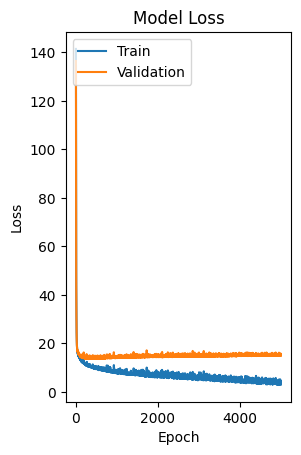

In [ ]:
# Plot training & validation accuracy values


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
NN_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 1000)              14000     
                                                                 
 dense_70 (Dense)            (None, 500)               500500    
                                                                 
 dense_71 (Dense)            (None, 200)               100200    
                                                                 
 dense_72 (Dense)            (None, 32)                6432      
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 621165 (2.37 MB)
Trainable params: 621165 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
